# 7. Enzyme-substrate kinetics

## Reminder of concept of Gibbs Free Enery 

A fundamental task of proteins is to act as catalysts of chemical reactions in the cell. A catalyst is actually a substance or factor to speed up our (chemical or biological) processes/reactions without taking part in them. 

In biochemical systems, these catalysts are called enzymes, and they increase the rate of virtually all the chemical reactions within cells.

To understand how enzymes speed up biochemical reactions we will introduce the concept of __Gibbs Free Energy__: a thermodynamic potential proportional to the maximum of reversible work that may be performed by a thermodynamic system at a constant temperature and pressure 
                                    (ΔGº = ΔHº-TΔSº)

A consequence of the second law of thermodynamics, is that every reaction tends to achieve a minimum in its Gibbs free energy. A quantitative measure of the favorability of a given reaction is the change ΔG caused by the reaction. ∆G can be understood as the amount of "free" or "useful" energy available to do work.

<img src="img/endergonic.png" width="400"/>

when the value of ∆G>0 means that the reaction requires free energy, so it cannot take place spontaneously (endergonic).

<img src="img/exergonic.png" width="400"/>

On the contrary, when the value of ∆G<0 means that the reaction liberates free energy as its proceeds, so its can take place spontaneously (exergonic).

### The Transition State and the role of enzymes

Between the state where molecules are reactants and the state where molecules are products in biochemical reactions, there is often a "bump" in the value of ∆G, which is often refereed as the __transition state__. In the transition state, the reactants are combined in a intermediate species called the activated complex. The stability of this intermediate activated complex affects the rate of the reaction (if it goes towars the producs or it goes towards the reactants). The higher the bump, the more difficult for the reaction to take place, even in conditions of strongly exergonic biochemical reactions (∆G<<0). 

A way to speed up (i.e., catalyze) a chemical reaction is by stabilization of this intermediate activated complex. A fundamental task of proteins in the cell is to act as these catalysts that increase the rate of virtually all the chemical reactions within cells. These type of proteins are called enzymes. In the absence of enzymatic catalysis, most biochemical reactions are so slow that they would not occur under the mild conditions of temperature and pressure that are compatible with life. Enzymes accelerate the rates of such reactions by well over a million-fold, so reactions that would take years in the absence of catalysis can occur in fractions of seconds if catalyzed by the appropriate enzyme.

In brief, the main features of an enzyme are:

- Increase the rate of reactions without being consumed or changed by the reaction. 
- Increase reaction rates without altering the chemical equilibrium between reactants and products (they do not change ∆G).
- Enzymes work by lowering the energy of the transition state. They stabilise the intermediate activated complex (they reduce the entropy)

<img src="img/enzyme.png" width="400"/>

Understanding enzyme kinetics is basic to understand how biological systems work.  In this notebook, we will approach the features of enzymatic reactions using a mathematical perspective, putting to work three of the tools that we just learned so far: 
- the Mass action Law, 
- the Mass conservation Law 
- the ability to solve ODEs numerically  

## The enzyme-substrate interaction scheme 

We will now solve the differential equations that result from a generic enzimatic reaction. The scheme of the reaction is as follows:
$$ s + e \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  c \overset{k_3}{\longrightarrow} p + e \tag{1}$$

where $s$ represents the substrate, $e$ represents the enzyme, $c$ represents the complex, and $p$ the product of the reaction. The reaction can be written as three irreversible reactions: 
$$\begin{align*}
s + e \rightarrow  c \tag{2}\\
c \rightarrow s + e \tag{3}\\
c \rightarrow p + e  \tag{4}
 \end{align*}$$


with kinetic constants `k1`, `k2` and `k3`, respectively. If we rename variables as $X_1=s,X_2=c, X_3=e, X_4=p$ to use the state vector approach.

$$\begin{align*}
X_1 + X_3 \rightarrow  X_2 \tag{2}\\
X_2 \rightarrow X_1 + X_3 \tag{3}\\
X_2 \rightarrow X_3 +  X_4 \tag{4}
 \end{align*}$$


The kinetics of these chemical equations is described by the __Mass action Law__ 


$$
A=\begin{bmatrix}
 1 & 0 & 1 & 0\\
 0 & 1 & 0 & 0 \\
 0 & 1 & 0 & 0\end{bmatrix} ;
B=\begin{bmatrix}
 0 & 1 & 0 & 0\\
 1 & 0 & 1 & 0 \\
 0 & 0 & 1 & 1\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
-1 & 1 & 0\\
 1 & -1  & -1\\
 -1 & 1 & 1 \\
 0 & 0 & 1\end{bmatrix} 
$$

 in this particular case

$$
K=\begin{pmatrix}
 k_1 & 0 & 0 \\
 0 & k_2 & 0 \\
 0 & 0 & k_3 
\end{pmatrix}
$$


$$X^A=\begin{pmatrix}
X_1^1\cdot X_2^0 \cdot X_3^1 \cdot X_4^0 \\
X_1^0\cdot X_2^1 \cdot X_3^0 \cdot X_4^0 \\
X_1^0\cdot X_2^1 \cdot X_3^0 \cdot X_4^0 \\
\end{pmatrix} = \begin{pmatrix}
X_1 \cdot X_3\\
 X_2\\
  X_2
\end{pmatrix}
$$

so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \\ \frac{\mathrm{d} X_4}{\mathrm{d} t}\end{bmatrix}= \begin{bmatrix}
-1 & 1 & 0\\
 1 & -1  & -1\\
 -1 & 1 & 1 \\
 0 & 0 & 1\end{bmatrix}\begin{pmatrix}
 k_1 & 0 & 0 \\
 0 & k_2 & 0 \\
 0 & 0 & k_3 
\end{pmatrix} \begin{pmatrix}
X_1 \cdot X_3\\
 X_2\\
  X_2
\end{pmatrix} 
\end{align}
$$
that when we operate the matrices becomes

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \\ \frac{\mathrm{d} X_4}{\mathrm{d} t}\end{bmatrix}= \begin{bmatrix}
-1 & 1 & 0\\
 1 & -1  & -1\\
 -1 & 1 & 1 \\
 0 & 0 & 1\end{bmatrix} \begin{pmatrix}
k_1 \cdot X_1 \cdot X_3\\
k_2 \cdot X_2\\
k_3 \cdot  X_2
\end{pmatrix} 
\end{align}
$$
and operating further,

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \\ \frac{\mathrm{d} X_4}{\mathrm{d} t}\end{bmatrix}= \begin{bmatrix}
-k_1 \cdot X_1 \cdot X_3 + k_2 \cdot X_2\\
 k_1 \cdot X_1 \cdot X_3 - k_2 \cdot X_2  - k_3 \cdot  X_2\\
-k_1 \cdot X_1 \cdot X_3 + k_2 \cdot X_2 + k_3 \cdot  X_2\\
 k_3 \cdot  X_2\end{bmatrix} 
\end{align}
$$

which rearranging terms provides the following set of coupled differential equations 

$$
\begin{align*}
  \dot{X_1}&= k_2 \cdot X_2 - k_1 X_3 \cdot X_1 \tag{8}\\ 
  \dot{X_2}&= k_1 \cdot X_3 \cdot X_1 - (k_2+k_3) \cdot X_2 \tag{9}\\
  \dot{X_3}&= (k_2+k_3) \cdot X_2 - k_1 \cdot X_3(t) \cdot X_1 \tag{10}\\ 
  \dot{X_4}&= k_3 \cdot X_2 \tag{11}
\end{align*}
$$

To solve it numericaly, we define the ODE problem as follows:
  

In [1]:
function simpleODEEnzyme!(du,u,p,t)
    k1,k2,k3 = p
    du[1] = k2*u[2] - k1*u[1]*u[3]
    du[2] = k1*u[1]*u[3] - (k2 + k3) * u[2]
    du[3] = -k1*u[1]*u[3]+(k2 + k3) * u[2]
    du[4] = k3 * u[2] 
end

simpleODEEnzyme! (generic function with 1 method)

In [3]:
using DifferentialEquations
using ParameterizedFunctions
using Plots; gr()

In [37]:
tspan = (0.0,100)
k1=1e3
k2=0.1
k3=0.05
e0=0.002
s0=0.002


u0=[s0,0,e0,0]
p=[k1,k2,k3];

In [38]:
problem = ODEProblem(simpleODEEnzyme!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.002, 0.0, 0.002, 0.0]

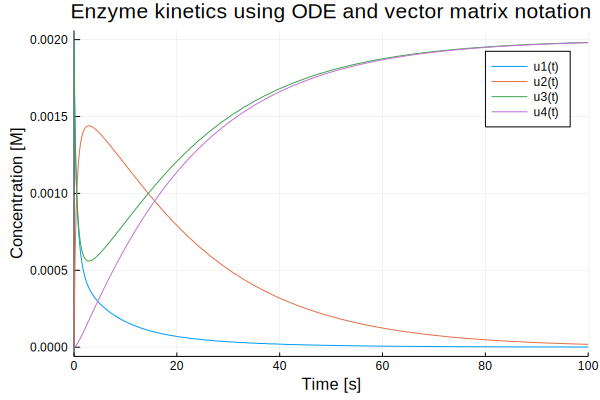

In [40]:
sol = solve(problem)
plot(sol)
title!("Enzyme kinetics using ODE and vector matrix notation")
xlabel!("Time [s]")
ylabel!("Concentration [M]")
#png("Michaelis_menten.png")

We can also use the simpler DSL direct notation, this is useful because we can use directly the differential equations with the original names of the variables:

$$\begin{align*}
  \dot{s}  &= k_2 \cdot c - k_1 \cdot e \cdot s \tag{5}\\
  \dot{c} &= k_1 \cdot e\cdot s - (k_2+k_3) \cdot c \tag{6}\\
  \dot{e} &= (k_2+k_3) \cdot c -k_1 \cdot e \cdot s \tag{7}\\
  \dot{p} &= k_3 \cdot c
  \end{align*}$$
  
(in Julia, we cannot use $e$ for the enzyme, so we use $en$)

In [8]:
enzyme_kinetics! = @ode_def ab begin
  ds = -k1*en*s+k2*c
  dc = k1*en*s-(k2+k3)*c
  den = -k1*en*s+(k2+k3)*c
  dp = k3*c
    end k1 k2 k3

(::ab{var"#3#7",var"#4#8",var"#5#9",Nothing,Nothing,var"#6#10",Expr,Expr}) (generic function with 2 methods)

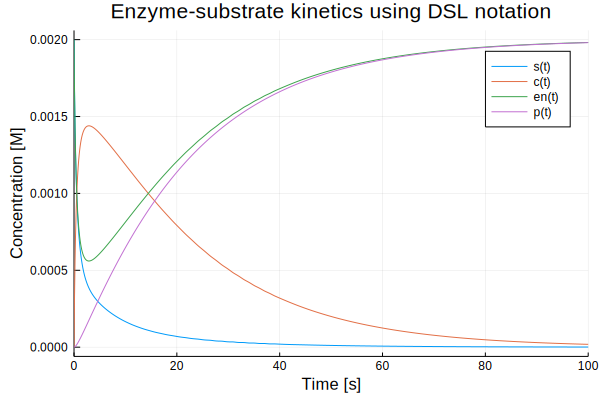

In [41]:
prob = ODEProblem(enzyme_kinetics!,u0,tspan,p)
sol = solve(prob)
plot(sol)
title!("Enzyme-substrate kinetics using DSL notation")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

The next step is to take advantage of the __Mass Conservation Law__ to reduce the number of independent variables (i.e, the number of differential equations to solve). 



$$ \begin{align*}
C_1 \cdot X_1 + C_2 \cdot X_2 + C_3 \cdot X_3 + C_4 \cdot X_4 & = cte \\
\end{align*}$$

so
$$ \begin{align*}
C \cdot (B-A)^T &=0\\ 
\begin{pmatrix}C_1 & C_2 & C_3 & C_4 \end{pmatrix} \begin{bmatrix}
-1 & 1 & 0\\
 1 & -1  & -1\\
 -1 & 1 & 1 \\
 0 & 0 & 1\end{bmatrix} &=0
 \end{align*}$$
 
the solution of the system of equations is: 
 $$ \begin{align*}
 -C_1 + C_2 - C_3= 0 &\implies  C_2 = C_3 + C_1\\
 -C_2 + C_3 + C_4= 0 &\implies  C_2 = C_3 + C_4 
\end{align*}$$

Therefore, from the two equations above, $C_1 = C_4$, and the conservation is:

$$ \begin{align*}
C_1 \cdot X_1(t) + (C_3 + C_1) \cdot X_2(t) + C_3 \cdot X_3(t) + C_1 \cdot X_4(t) &= cte\\
C_1 \cdot X_1(t) + C_3 \cdot X_2(t) + C_1 \cdot X_2(t)  + C_3 \cdot X_3(t) + C_1 \cdot X_4(t) &= cte\\
\end{align*}$$

which is valid for any value of $C_1$ and $C_3$, so, separating these two dependencies

$$ \begin{align*}
C_1 \cdot X_1(t) + C_1 \cdot X_2(t)  + C_1 \cdot X_4(t) &= cte\\
\end{align*}$$

which makes sense, since the $s$, $c$ and $p$ are three forms of the same protein, and their sum has to be constant,a nd equal to the initial value of substrate used. Using the value $C_1=1$ we obtain:

$$ \begin{align*}
X_1(t) + X_2(t) + X_4(t) &= cte = X_1(0) + X_2(0) + X_4(0) =  X_1(0) \\
\end{align*}$$

is our first conservation law (typically we start a biochemical reaction adding only $e$ and $s$). For the second, we use the parameters that depend on the other constant $C_2$ 

$$ \begin{align*}
C_3 \cdot X_2(t) + C_3 \cdot X_3(t) &= cte
\end{align*}$$

which also makes sense, because the amoun of enzyme is not consumed and is only in teh form of the reactans $e$ and $c$. So, giving the value $C_3=1$, we obtain the conservation law, 
$$ \begin{align*}
X_2(t) + X_3(t) & = cte &= X_2(0) + X_3(0) = X_3 (0) 
\end{align*}$$

which is true because the enzyme is a catalyst that facilitates the reaction but does not react itself, and if we assume that there is no complex $c(0)=0$ before the reacton starts, we can assume ($e(0)+c(0)=e_0$). This conservation law allows us to reduce the four differential equations into the following three coupled ordinary differential equations:

$$\begin{align*}
  \dot{s}  &= k_2 \cdot c - k_1 \cdot (e_0-c) \cdot s \tag{12}\\
  \dot{c} &= k_1 \cdot (e_0-c)\cdot s - (k_2+k_3) \cdot c \tag{13}\\
  \dot{p} &= k_3 \cdot c \tag{14}
  \end{align*}$$
  
which rearranging terms become:

$$\begin{align*}
  \dot{s}  &= (k_2+k_1 \cdot s) \cdot c -k_1 \cdot e_0 \cdot s \tag{15}\\ 
  \dot{c} &= k_1\cdot e_0\cdot s-(k_3+k_2+k_1 \cdot s) \cdot c \tag{16}\\
  \dot{p} &= k_3 \cdot c \tag{17}
  \end{align*}$$
  

In [42]:
enzyme_kinetics2! = @ode_def ab begin
  ds = (k2+s*k1)*c-k1*e0*s
  dc = k1*e0*s-(k2+k3+k1*s)*c
  dp = k3*c
    end k1 k2 k3 e0

(::ab{var"#67#71",var"#68#72",var"#69#73",Nothing,Nothing,var"#70#74",Expr,Expr}) (generic function with 2 methods)

In [43]:
tspan = (0.0,100.0)
u0=[s0,0,0]
p=[k1,k2,k3,e0];

prob = ODEProblem(enzyme_kinetics2!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.002, 0.0, 0.0]

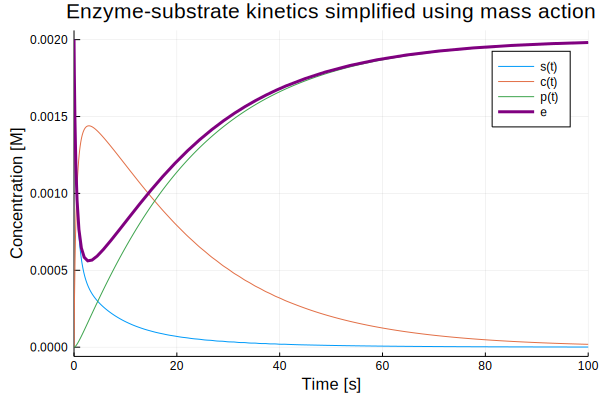

In [44]:
sol_ = solve(prob)
plot(sol_)
e=[p[4]-u[2] for (u,t) in tuples(sol_)]
plot!(sol_.t,e,
        label="e",
        linealpha = 1,
        linewidth = 3,
        linecolor = :purple)
title!("Enzyme-substrate kinetics simplified using mass action")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## Quasi steady state approximation:

The other conservation law could be used to reduce teh system to just two equations, but instead, we will use another approiximation that allows us to go further and reduce the system to a single differential equation. Thsi aproximation si swidely used in all biochemistry books and has been famously proposed by Miachelis and Menten. In briefm it assumes that the formation and degradation of the intermediate complex is often very fast and reaches equilibrium early in the reaction. 

$$k_1\cdot x_1(0) ≈ k_2 >> k_3 \tag{18}$$ 


The substrate-enzyme binding occurs at much faster time scales than the turnover into product (often the case in biologically relevant biochemical reactions)

Under these circumstances one expects that after an initial short transient period there will be a balance between the formation of the enzyme-substrate complex and the breaking apart of complex (either to enzyme and substrate, or to enzyme and product) 

$$ \frac{d c}{dt}= \frac{d e}{dt}=0 \tag{19}$$

In these conditions, we can calculate the equilibrium for $c$ from eq. 2.16 as 

$$c_{eq}=\frac{k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s} \tag{20}$$

This is called the __pseudo-steady state aproximation__ for biochemical systems

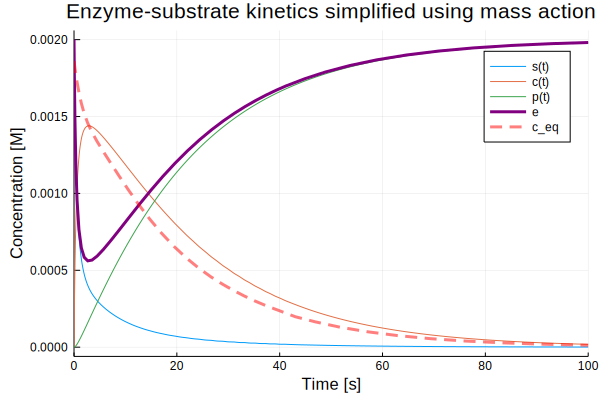

In [45]:
c_eq=[(p[1] * p[4] * u[1])/(p[3]+p[2]+p[1] * u[1]) for (u,t) in tuples(sol)]
plot!(sol.t,c_eq,
        label="c_eq",        
        linealpha = 0.5,
        linewidth = 3,
        linestyle= :dash,
        linecolor = :red)

As we can see, the equilibrium solution $c_{eq}$ is quite close to the concentration of $c$, in this conditions we can simplify all equations as:
  
$$\begin{align*}
  \dot{s}  &= (k_2+k_1 \cdot s) \cdot \frac{k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s} -k_1 \cdot e_0 \cdot s \tag{21}\\ 
  \dot{p}  &= k_3 \frac{k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s} \tag{22}
\end{align*}$$

Eq. 2.20 can be rewritten in a more simplified form, after some some algebraic manipulation:

$$\begin{align*}
  \dot{s}  &= (k_2+k_1 \cdot s) \cdot \frac{k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s} -k_1 \cdot e_0 \cdot s \tag{23}\\ 
   \dot{s}  &= k_1 \cdot e_0 \cdot s  \left [ \frac{k_2+k_1 \cdot s}{k_3+k_2+k_1 \cdot s} -1 \right ]  \tag{24}\\ 
\dot{s}  &= k_1 \cdot e_0 \cdot s  \left [ \frac{k_2+k_1 \cdot s - k_3-k_2-k_1 \cdot s}{k_3+k_2+k_1 \cdot s} \right ]  \tag{25}\\ 
\dot{s}  &=   \left [ \frac{- k_3\cdot k_1 \cdot e_0  \cdot s}{k_3+k_2+k_1 \cdot s} \right ]  \tag{26}\\ 
\end{align*}$$

So the final set of equations takes the form:

$$\begin{align*}
  \dot{s}  &=- \frac{k_1 \cdot k_3 \cdot e_0 \cdot s}{k_3+k_2+k_1 \cdot s} \tag{27}\\ 
  \dot{p}  &=  \frac{ k_3 \cdot k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s} \tag{28}
\end{align*}$$



In [46]:
enzyme_kinetics10! = @ode_def ab begin
     ds = - (k3 * e0 * s)/((k3+k2)/k1 +  s)
     dp = (k3 * e0 * s)/((k3+k2)/k1 +  s)
    end k1 k2 k3 e0


(::ab{var"#79#83",var"#80#84",var"#81#85",Nothing,Nothing,var"#82#86",Expr,Expr}) (generic function with 2 methods)

In [47]:
tspan = (0.0,100.0)

k1=1e3
k2=0.1
k3=0.05
e0=0.002
s0=0.002

u0=[s0,0.00001]
p=[k1,k2,k3,e0];
prob10 = ODEProblem(enzyme_kinetics10!,u0,tspan,p)


ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.002, 1.0e-5]

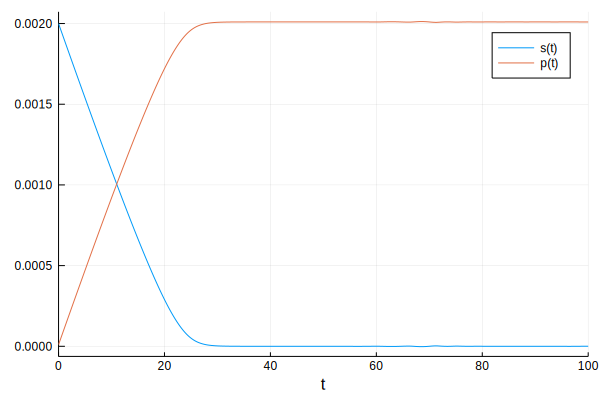

In [48]:
sol10 = solve(prob10)
plot(sol10)


Now, the conservation of mass $s+p=s_0$ allows us to reduce everything to a single ODE:
$$
  \dot{p}  =  \frac{ k_3 \cdot k_1\cdot e_0\cdot (s_0-p)}{k_3+k_2+k_1 \cdot (s_0-p)} \tag{29}
$$

Or, if the divide every term by $k_1$
$$
  \dot{p}  =  \frac{ k_3 \cdot e_0\cdot (s_0-p)}{\frac{k_3+k_2}{k_1}+(s_0-p)} \tag{30}
$$

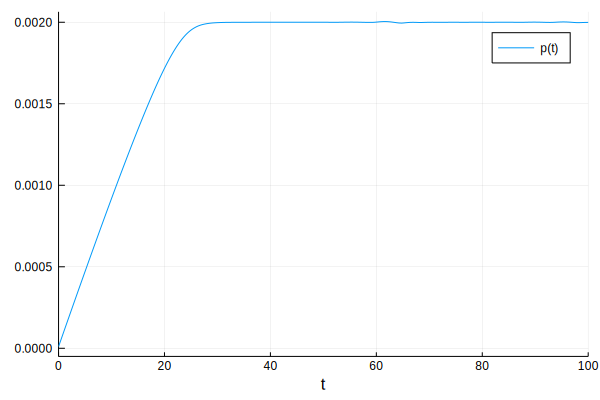

In [49]:
enzyme_kinetics3! = @ode_def ab begin
  dp = (k3 * e0 * (s0 - p))/((k3+k2)/k1 +  (s0 - p))
    end k1 k2 k3 e0 s0
tspan = (0.0,100.0)

u0=[0.00001]
p=[k1,k2,k3,e0,s0];
prob2 = ODEProblem(enzyme_kinetics3!,u0,tspan,p)
sol2 = solve(prob2)
plot(sol2)

We can compare directly this steady state aproximation wit the mass action solution for the product

### <font color=red>Computer Exercise:</font>

Solve numerically the enzyme-substrate system simplified with the previous pseudo-steady state approximation and compare its performance and accuracy by proving the value of p(t) of the simplified system with the prediction of $p(t)$ using the full system. Find parameters where the pseudo-steady state aproximation is a better approximation to the the full system. 


In [1]:
tspan = (0.0,100.0)
k1=1e3
k2=0.1
k3=0.05
e0=0.002
s0=0.002

0.002

## Michaelis-Menten equation: 

The previous equation 

$$
  \dot{p}  =  \frac{ k_3 \cdot e_0\cdot (s_0-p)}{\frac{k_3+k_2}{k_1}+(s_0-p)} \tag{31}
$$

leads to the traditional Michaelis-Menten equation, which predicts the initial turnover rate of the enzymatic reaction $V_0$ as a function of initial substrate concentration $s_0$. So at the initial state of the reaction ($p=0$):

$$
  V_0  =  \frac{ k_3 \cdot e_0\cdot s_0}{\frac{k_3+k_2}{k_1}+s_0}=\frac{ v_{max} \cdot s_0}{K_M+s_0} \tag{32}
$$


where the constant $K_M = \frac{k_3+k_2}{k_1}$ is called the Michaelis-Menten constant and $v_{max}= k_3 \cdot e_0$ is the maximum turn-over rate. 
The $K_M$  reflects the affinity of the reaction. Strong affinity means small $K_M$. At $s_0=K_M$ the turn-over rate is half maximal, i.e., $\dot{p}=\frac{v_{max}}{2}$



### Michaelis-Menten curve

The famous Michaelis-Menten plot is a culve that shows the dependence of the velocity of the reaction in terms of production of product (i.e., $\dot p$) on teh concetration of substrate. It showns three regimes:
- __linear__: there is a lot of enzyme available to bind the substrate, so the velocity of teh reaction increases linearly with the concetration of subtrate, as it ocurs in noncatalized reactions. 
- __Constrained__: the intermediate regime 
- __Saturated__: there is a lot of substrate available, and the enzyme is the limitant factor for the catalisis, so the speed of teh reactioon does not increase if the increase further the concetration of substrate.

K_m = 0.00015000000000000001


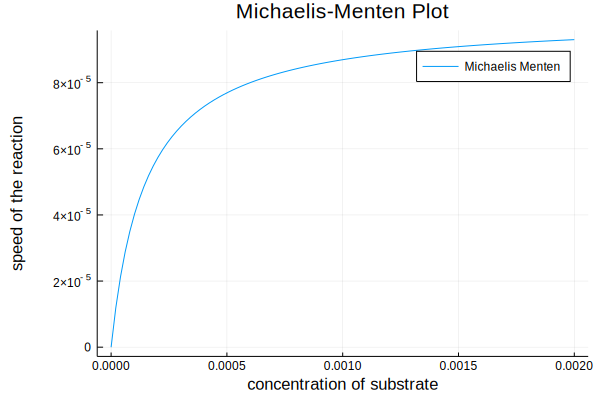

In [19]:
s_vector= s0*LinRange(0,1,100)
plot(s_vector,k3 * e0 * s_vector ./(s_vector.+(k3+k2)/k1),label="Michaelis Menten",)
println("K_m = ",(k3+k2)/k1)
title!("Michaelis-Menten Plot")
xlabel!("concentration of substrate")
ylabel!("speed of the reaction")

### How good is the Michaelis-Menten Approach

We can compare this analytical equation with the result of the numerical simulation of the full ODE system. To do that we solve the numerical system, and compare the rates of the reactions predicted by the Mass action and the Michaelis-Menten approach.

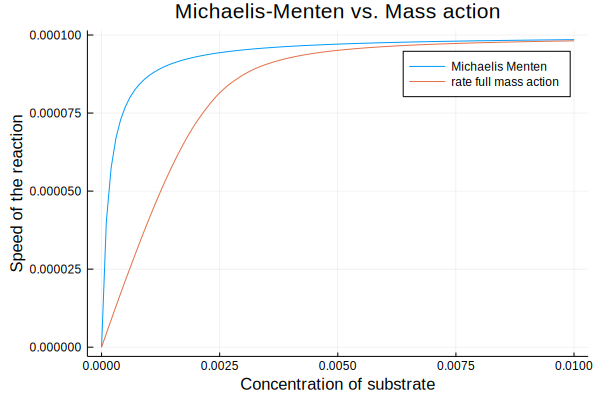

In [20]:
"k1=1e2
k2=1e0
k3=0.01
e0=1e-2
s0=1e-2"

s_vector= s0*LinRange(0,1,100)*5
p=[k1,k2,k3,e0]
plot(s_vector,k3 * e0 * s_vector ./(s_vector.+(k3+k2)/k1),label="Michaelis Menten",)
title!("Michaelis-Menten Plot")
xlabel!("Concentration of substrate")
ylabel!("Speed of the reaction")

tspan = (0.0,10)
#p=[1e3,0.1,0.05,0.001]
speed_vector = similar(s_vector)
for i in 1:100 
u0=[s_vector[i],0,0]
    prob = ODEProblem(enzyme_kinetics2!,u0,tspan,p)
    sol_ = solve(prob)
    # we shoudl compute the speed at the maximum formation of Complex. 
    speed=[k3*u[2] for (u,t) in tuples(sol_)]
 speed_vector[i]=maximum(speed)
end
plot!(s_vector,speed_vector,label="rate full mass action")
title!("Michaelis-Menten vs. Mass action")
xlabel!("Concentration of substrate")
ylabel!("Speed of the reaction")

This analysis shows that the Michaelis-Menten approach is valid when the amount of $s$ is higher that amount of $e$

## Kinase-Phosphatase systems

If we want to compute the equilibrium concentration for the product `p`, we have to make the last eq equal to `0` :, 
$$
\dot{p}=\frac{k_3 \cdot e_0 (s_0-p)}{K_M + (s_0-p)} =0  \tag{33}
$$

so we simply obtain:
 
 $$\begin{align*}
k_3 \cdot e_0 (s_0-p_{eq})=0\tag{34}\\
p_{eq}=s_0\tag{35}
 \end{align*}$$

which means that all substrate is converted into product eventually. This means that, once all substrate is consumed the reaction is finished, and there is no way to reverse it. Of course, living systems do not work like that, i.e., there is allways a balance in the form of a dynamical equilibrium between reactions, (such as in reversible chemical reactions). This equilibrium, in enzyme-catalized reactions, is achieved by combining pairs of enzymes that perform opposite tasks, i.e., that catalize opposite reactions. 

Quite often, one enzyme catalizes the formation from `s` to `p`, there is another enzyme that catalizes the transformation of `p` back to `s`.

$$\begin{align*}
s + e1 \leftrightarrow  e1s \rightarrow p + e1 \tag{36}\\
p + e2 \leftrightarrow  e2p \rightarrow s + e2  \tag{37}
\end{align*}$$

whith kinetic rate constants $k_1$, $k_2$ and $k_3$, for the first reaction, and $k_4$, $k_5$ and $k_6$, for the second reaction. If we write the sistem as irreversible reactions, we obatin 6 reactions:

$$\begin{align*}
s + e1 \rightarrow  e1s \tag{38}\\
e1s \rightarrow s + e1 \tag{39}\\
e1s \rightarrow p + e1 \tag{40}\\
p + e2 \rightarrow e2p \tag{41}\\
e2p \rightarrow p + e2 \tag{42}\\
e2p \rightarrow s + e2 \tag{43}
 \end{align*}$$
 
Lets compute the matrices form the Mass action law. If we rename variables as $X_1=s, X_2=e1s, X_3=e1, X_4=p, X_5=e2p, X_6=e2$ to use the state vector approach.

$$\begin{align*}
X_1 + X_3 \rightarrow  X_2 \\
X_2 \rightarrow X_1 + X_3 \\
X_2 \rightarrow X_3 +  X_4 \\
X_4 + X_6 \rightarrow X_5\\
X_5 \rightarrow X_4 + X_6 \\
X_5 \rightarrow X_1 + X_6 
 \end{align*}$$


The kinetics of these chemical equations is described by the __Mass action Law__ 


$$
A=\begin{bmatrix}
 1 & 0 & 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 & 0 & 0\\
 0 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 1 & 0 & 1\\
  0 & 0 & 0 & 0 & 1 & 0\\
   0 & 0 & 0 & 0 & 1 & 0\end{bmatrix} ;
B=\begin{bmatrix}
 0 & 1 & 0 & 0 & 0 & 0 \\
 1 & 0 & 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 1 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1 & 0 & 1 \\
 1 & 0 & 0 & 0 & 0 & 1
 \end{bmatrix} ; 
 (B-A)^T= \begin{bmatrix}
 -1 &  1 &  0 &  0 &  0 &  1\\
  1 & -1 & -1 &  0 &  0 &  0\\
 -1 &  1 &  1 &  0 &  0 &  0 \\
  0 &  0 &  1 & -1 &  1 &  0 \\
  0 &  0 &  0 &  1 & -1 & -1 \\
  0 &  0 &  0 & -1 &  1 &  1\end{bmatrix} 
$$
 in this particular case

$$
K=\begin{pmatrix}
 k_1 & 0 & 0 & 0 & 0 & 0\\
 0 & k_2 & 0 & 0 & 0  & 0\\
 0 & 0 & k_3 & 0 & 0 & 0\\
 0 & 0 & 0 & k_4 & 0  &0\\
 0 & 0 & 0 & 0 & k_5 & 0 \\
  0 & 0 & 0 & 0 & 0 & k_6 
\end{pmatrix}
$$


$$X^A=\begin{pmatrix}
X_1^1\cdot X_2^0 \cdot X_3^1 \cdot X_4^0 \cdot X_5^0 \cdot X_6^0\\
X_1^0\cdot X_2^1 \cdot X_3^0 \cdot X_4^0 \cdot X_5^0 \cdot X_6^0\\
X_1^0\cdot X_2^1 \cdot X_3^0 \cdot X_4^0 \cdot X_5^0 \cdot X_6^0\\
X_1^0\cdot X_2^0 \cdot X_3^0 \cdot X_4^1 \cdot X_5^0 \cdot X_6^1\\
X_1^0\cdot X_2^0 \cdot X_3^0 \cdot X_4^0 \cdot X_5^1 \cdot X_6^0\\
X_1^0\cdot X_2^0 \cdot X_3^0 \cdot X_4^0 \cdot X_5^1 \cdot X_6^0
\end{pmatrix} = \begin{pmatrix}
X_1 \cdot X_3\\
 X_2\\
  X_2\\
  X_4 \cdot X_6\\
  X_5\\
  X_5
\end{pmatrix}
$$
so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \\ \frac{\mathrm{d} X_4}{\mathrm{d} t} \\ \frac{\mathrm{d} X_5}{\mathrm{d} t} \\ \frac{\mathrm{d} X_6}{\mathrm{d} t}\end{bmatrix}= \begin{bmatrix}
 -1 &  1 &  0 &  0 &  0 &  1\\
  1 & -1 & -1 &  0 &  0 &  0\\
 -1 &  1 &  1 &  0 &  0 &  0 \\
  0 &  0 &  1 & -1 &  1 &  0 \\
  0 &  0 &  0 &  1 & -1 & -1 \\
  0 &  0 &  0 & -1 &  1 &  1\end{bmatrix}\begin{pmatrix}
 k_1 & 0 & 0 & 0 & 0 & 0\\
 0 & k_2 & 0 & 0 & 0  & 0\\
 0 & 0 & k_3 & 0 & 0 & 0\\
 0 & 0 & 0 & k_4 & 0  &0\\
 0 & 0 & 0 & 0 & k_5 & 0 \\
  0 & 0 & 0 & 0 & 0 & k_6 
\end{pmatrix} \begin{pmatrix}
X_1 \cdot X_3\\
 X_2\\
  X_2\\
  X_4 \cdot X_6\\
  X_5\\
  X_5
\end{pmatrix}
\end{align}
$$
that when we operate the matrices becomes

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \\ \frac{\mathrm{d} X_4}{\mathrm{d} t} \\ \frac{\mathrm{d} X_5}{\mathrm{d} t} \\ \frac{\mathrm{d} X_6}{\mathrm{d} t}\end{bmatrix}= \begin{bmatrix}
 -1 &  1 &  0 &  0 &  0 &  1\\
  1 & -1 & -1 &  0 &  0 &  0\\
 -1 &  1 &  1 &  0 &  0 &  0 \\
  0 &  0 &  1 & -1 &  1 &  0 \\
  0 &  0 &  0 &  1 & -1 & -1 \\
  0 &  0 &  0 & -1 &  1 &  1\end{bmatrix} \begin{pmatrix}
k_1 \cdot X_1 \cdot X_3\\
 k_2 \cdot X_2\\
  k_3 \cdot X_2\\
  k_4 \cdot X_4 \cdot X_6\\
  k_5 \cdot X_5\\
  k_6 \cdot X_5
\end{pmatrix}
\end{align}
$$

and operating further,

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \\ \frac{\mathrm{d} X_3}{\mathrm{d} t} \\ \frac{\mathrm{d} X_4}{\mathrm{d} t} \\ \frac{\mathrm{d} X_5}{\mathrm{d} t} \\ \frac{\mathrm{d} X_6}{\mathrm{d} t}\end{bmatrix}=  \begin{bmatrix}
-k_1 \cdot X_1 \cdot X_3 + k_2 \cdot X_2 + k_6 \cdot X_5\\
 k_1 \cdot X_1 \cdot X_3 - k_2 \cdot X_2  - k_3 \cdot  X_2\\
-k_1 \cdot X_1 \cdot X_3 + k_2 \cdot X_2 + k_3 \cdot  X_2\\
k_3 \cdot X_2 -  k_4 \cdot X_4 \cdot X_6 + k_5 \cdot X_5\\
  k_4 \cdot X_4 \cdot X_6 - k_5 \cdot X_5 - k_6 \cdot X_5\\
-  k_4 \cdot X_4 \cdot X_6 + k_5 \cdot X_5 + k_6 \cdot X_5
\end{bmatrix} 
\end{align}
$$
 
 which,operating further and substituting for the original names of the variables, it gives us a set of six differential equations:
 
 $$\begin{align*}
  \dot{s}   &= -k_1 \cdot s \cdot e1 + k_2 \cdot e1s + k_6 \cdot e2p \\
  \dot{e1s} &= k_1 \cdot e1 \cdot s - (k_2 + k_3) \cdot e1s \\
  \dot{e1}  &= -k_1 \cdot s \cdot e1 + (k_2 + k_3) \cdot e1s \\
  \dot{p}   &= -k_4 \cdot p \cdot e2  + k_5 \cdot e2p + k_3 \cdot e1s \\
   \dot{e2p} &= k_4 \cdot e2 \cdot p - (k_5 + k_6) \cdot e2p \\
  \dot{e2}  &= -k_4 \cdot p \cdot e2 + (k_5 + k_6) \cdot e2p 
  \end{align*}$$

With these equations we define an ODE vector function using the DSL notation:

In [21]:
enzyme_kinetics4! = @ode_def ab begin
  ds   = -k1 * s * e1 + k2 * e1s + k6 * e2p
  de1  = -k1 * s * e1 + (k2 + k3) * e1s
  de2  = -k4 * p * e2 + (k5 + k6) * e2p
  de1s =  k1 * e1 * s - (k2 + k3) * e1s
  de2p =  k4 * e2 * p - (k5 + k6) * e2p
  dp   = -k4 * p* e2  + k5 * e2p + k3 * e1s 
    end k1 k2 k3 k4 k5 k6

(::ab{var"#43#47",var"#44#48",var"#45#49",Nothing,Nothing,var"#46#50",Expr,Expr}) (generic function with 2 methods)

In [51]:
tspan = (0.0,100)
k1=0.5e3
k2=0.15
k3=0.03
k4=1e3
k5=0.1
k6=0.01

e10=0.002
e20=0.002
s0=0.002
p0=0.001

u0=[s0,e10,e20,0,0,p0]
p=[k1,k2,k3,k4,k5,k6];

In [52]:
prob4 = ODEProblem(enzyme_kinetics4!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.002, 0.002, 0.002, 0.0, 0.0, 0.001]

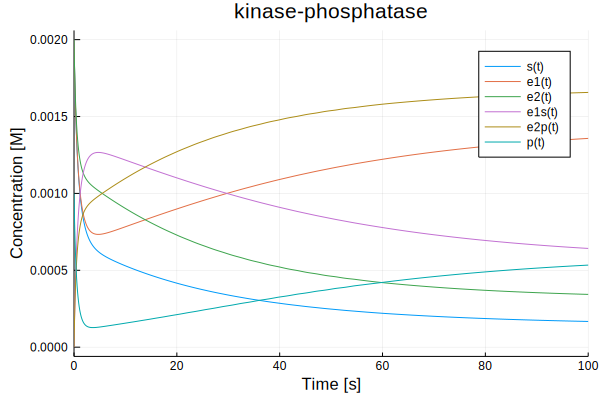

In [54]:
sol4 = solve(prob4)
plot(sol4)
title!("kinase-phosphatase")
xlabel!("Time [s]")
ylabel!("Concentration [M]")
#png("Michaelis_menten.png")

We can take advantage of the conservation of mass (as in systems with one enzyme) to go from six to four differential equations. 

$$ \begin{align*}
C_1 \cdot X_1 + C_2 \cdot X_2 + C_3 \cdot X_3 + C_4 \cdot X_4 + C_5 \cdot X_5 + C_6 \cdot X_6 & = cte \\
\end{align*}$$

so
$$ \begin{align*}
C \cdot (B-A)^T &=0\\ 
\begin{pmatrix}C_1 & C_2 & C_3 & C_4 & C_5 & C_6\end{pmatrix} \begin{bmatrix}
 -1 &  1 &  0 &  0 &  0 &  1\\
  1 & -1 & -1 &  0 &  0 &  0\\
 -1 &  1 &  1 &  0 &  0 &  0 \\
  0 &  0 &  1 & -1 &  1 &  0 \\
  0 &  0 &  0 &  1 & -1 & -1 \\
  0 &  0 &  0 & -1 &  1 &  1\end{bmatrix}  &=0
 \end{align*}$$
 
 
 the solution of the system of equations is: 
 $$ \begin{align*}
 -C_1 + C_2 - C_3= 0 &\implies  C_2 = C_3 + C_1\\
 -C_2 + C_3 + C_4= 0 &\implies  C_2 = C_3 + C_4\\
 - C_4 + C_5 - C_6 = 0 &\implies  C_5=C_4 + C_6\\
 C_1 - C_5 + C_6 =0 &\implies  C_5= C_1 + C_6
\end{align*}$$

Therefore, from the set of equations above, we obatin $C_1 = C_4$ (as in the case of one enzyem and one substrate. Therefore, the conservation of mass is:

$$ \begin{align*}
C_1 \cdot X_1(t) + (C_3 + C_1) \cdot X_2(t) + C_3 \cdot X_3(t) + C_1 \cdot X_4(t) +  (C_6 + C_1) \cdot X_5(t) + C_6 \cdot X_6(t)&= cte\\
C_1 \cdot X_1(t) + C_3 \cdot X_2(t) + C_1 \cdot X_2(t)  + C_3 \cdot X_3(t) + C_1 \cdot X_4(t) + C_6 \cdot X_5(t) + C_1 \cdot X_5(t) + C_6 \cdot X_6(t)&= cte\\
\end{align*}$$
which is valid for any value of $C_1$, $C_3$ and $C_6$, so, separating these dependencies


$$ \begin{align*}
C_1 \cdot X_1(t) + C_1 \cdot X_2(t) + C_1 \cdot X_4(t) + C_1 \cdot X_5 (t)&= cte\\
\end{align*}$$

which makes sense, since the $s$, $e1s$, $e2p$ and $p$ are four forms of the same protein, and their sum has to be constant, and equal to the initial value of substrate used. Using the value $C_1=1$ we obtain:

$$ \begin{align*}
X_1(t) + X_2(t) + X_4(t) + X_5 (t) &= cte = X_1(0) + X_2(0) + X_4(0) + X_5(0)=  X_1(0) + X_4(0)\\
\end{align*}$$

is our first conservation law (typically we start a biochemical reaction adding only the two substrates $s$ and $p$ and the two enzymes $e1$ and $e2$). For the second, we use the parameters that depend on the other constant $C_2$ 
 
$$ \begin{align*}
C_3 \cdot X_2(t) + C_3 \cdot X_3(t) &= cte
\end{align*}$$

This is the same conservation law that we obtained for the simple single enzyme-substrate system studiend previously. So, giving the value $C_3=1$, we obtain the conservation law, 

$$ \begin{align*}
X_2(t) + X_3(t) & = cte &= X_2(0) + X_3(0) = X_3 (0) 
\end{align*}$$

For the other constant $C_6$: 
$$ \begin{align*}
C_6 \cdot X_5(t) + C_6 \cdot X_6(t) &= cte
\end{align*}$$

which is true because the enzyme $e2$ is also a catalyst that facilitates the reaction but does not react itself, and if we assume that there is no complex $e2p(0)=0$ before the reacton starts, we can assume ($e2(0)+e2p(0)=e2_0$). 

This conservation law together with the previous one, allows us to reduce the system of 6 differential equations to just four  coupled ordinary differential equations:
 
 $$\begin{align*}
  \dot{s}   &= -k_1 \cdot s \cdot e1_0 + (k_2 + k_1 \cdot s) \cdot e1s + k_6 \cdot e2p \tag{52}\\
  \dot{e1s} &= k_1 \cdot e1_0 \cdot s - (k_2 + k_3 + k_1 \cdot s) \cdot e1s \tag{53}\\
  \dot{e2p} &= k_4 \cdot e2_0 \cdot p - (k_5 + k_6 + k_4 \cdot p) \cdot e2p \tag{54}\\
  \dot{p}   &= -k_4 \cdot p \cdot e2_0  + (k_5 + k_4 \cdot p) \cdot e2p + k_3 \cdot e1s \tag{55}
  \end{align*}$$

In [25]:
enzyme_kinetics5! = @ode_def ab begin
  ds   = -k1 * s * e10 + (k2 + k1 * s) * e1s + k6 * e2p
  de1s =  k1 * e10 * s - (k2 + k3 + k1 * s) * e1s
  de2p =  k4 * e20 * p - (k5 + k6 + k4 * p) * e2p
  dp   = -k4 * p * e20  + (k5 + k4 * p) * e2p + k3 * e1s
    end k1 k2 k3 k4 k5 k6 e10 e20

(::ab{var"#51#55",var"#52#56",var"#53#57",Nothing,Nothing,var"#54#58",Expr,Expr}) (generic function with 2 methods)

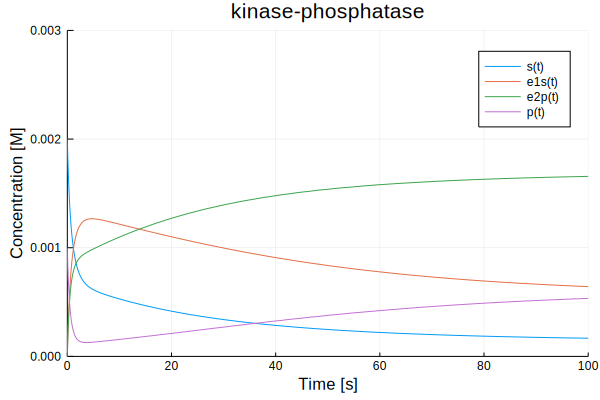

In [55]:
u0=[s0,0,0,p0]
p=[k1,k2,k3,k4,k5,k6,e10,e20];
prob5 = ODEProblem(enzyme_kinetics5!,u0,tspan,p)
sol5 = solve(prob5)
plot(sol5,ylims = (0,s0+p0))
title!("kinase-phosphatase")
xlabel!("Time [s]")
ylabel!("Concentration [M]")
#png("Michaelis_menten.png")

The concentration of `e1` and `e2` can be also plotted by simply using the mass conservation:;

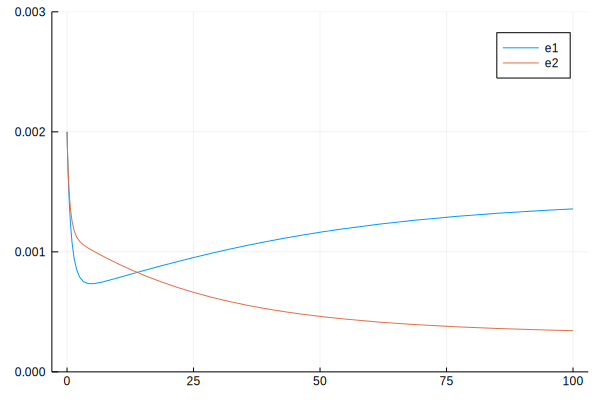

In [63]:
plot(sol5.t,[e10.-sol5[2,:],e20.-sol5[3,:]],label = ["e1" "e2"],ylims = (0,s0+p0))

## Quasi steady state approximation:

If we consider the pseudo-steady state approximation typical for biochemical systems (i.e., dynamic of intermediate complexes very fast compared with the other reactions), 

$$ 
\begin{align*}
k_1 \cdot s(0) ≈ k_2 >> k_3 \tag{56}\\
k_4 \cdot p(0) ≈ k_5 >> k_6 \tag{57}
 \end{align*}$$
 
if this is true, we wan simplify the system by using the following rules:

$$ \frac{d e1s}{dt}= \frac{d e1}{dt}=\frac{d e2p}{dt}=\frac{d e2}{dt}=0 \tag{58}$$

so, the equilibrium concentrations for `e1s`and `e2p` are simply:

 $$\begin{align*}
  e1s &= \frac{k_1 \cdot e1_0 \cdot s}{k_2 + k_3 + k_1 \cdot s} \tag{59}\\
  e2p &= \frac{k_4 \cdot e2_0 \cdot p }{k_5 + k_6 + k_4 \cdot p} \tag{60}
  \end{align*}$$

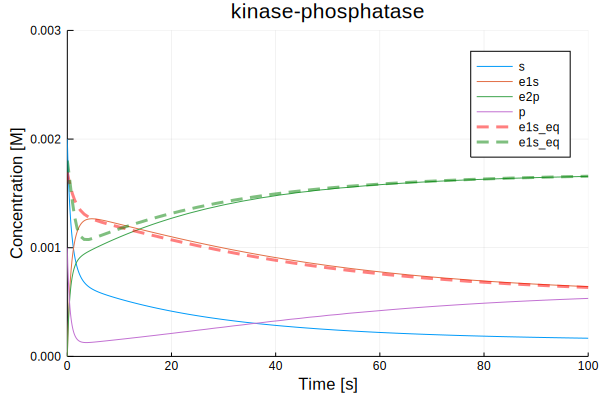

In [64]:
e1s_eq=(p[1] .* p[7] .* sol5[1,:])./(p[2].+p[3].+p[1] .* sol5[1,:])
e2sp_eq=(p[4] .* p[8] .* sol5[4,:])./(p[5].+p[6].+p[4] .* sol5[4,:])

plot(sol5,label=["s" "e1s" "e2p" "p"])
title!("kinase-phosphatase")
xlabel!("Time [s]")
ylabel!("Concentration [M]")
#png("Michaelis_menten.png")

plot!(sol5.t,e1s_eq,
        ylims = (0,s0+p0),
        label="e1s_eq",        
        linealpha = 0.5,
        linewidth = 3,
        linestyle= :dash,
        linecolor = :red)


plot!(sol5.t,e2sp_eq,
        label="e1s_eq",        
        linealpha = 0.5,
        linewidth = 3,
        linestyle= :dash,
        linecolor = :green)


As we can see, the two equilibrium solutions are again quite close to the concentration of `e1s` and `e2p`, in this conditions we can simplify all equations as:
  
$$\begin{align*}
  \dot{s}   &= -k_1 \cdot s \cdot e1_0 + (k_2 + k_1 \cdot s) \cdot \frac{k_1 \cdot e1_0 \cdot s}{k_2 + k_3 + k_1 \cdot s} +  \frac{k_6 \cdot k_4 \cdot e2_0 \cdot p }{k_5 + k_6 + k_4 \cdot p} \tag{61}\\
  \dot{p}   &= -k_4 \cdot p \cdot e2_0  + (k_5 + k_4 \cdot p) \cdot \frac{k_4 \cdot e2_0 \cdot p }{k_5 + k_6 + k_4 \cdot p} +  \frac{ k_3 \cdot k_1 \cdot e1_0 \cdot s}{k_2 + k_3 + k_1 \cdot s} \tag{62}
\end{align*}$$

which, after some manipulation become

$$\begin{align*}
  \dot{s}   &= k_1 \cdot e1_0 \cdot  s \left [  \frac{k_2 + k_1 \cdot s}{k_2 + k_3 + k_1 \cdot s} -1\right ]  +  \frac{k_6 \cdot k_4 \cdot e2_0 \cdot p }{k_5 + k_6 + k_4 \cdot p} \tag{63}\\
  \dot{p}   &= k_4 \cdot e2_0 \cdot p   \left [  \frac{k_5 + k_4 \cdot p }{k_5 + k_6 + k_4 \cdot p} -1 \right ] +  \frac{ k_3 \cdot k_1 \cdot e1_0 \cdot s}{k_2 + k_3 + k_1 \cdot s} \tag{64}
\end{align*}$$


$$\begin{align*}
  \dot{s}   &= k_1 \cdot e1_0 \cdot  s \left [  \frac{k_2 + k_1 \cdot s- k_2 -  k_3 - k_1 \cdot s}{k_2 + k_3 + k_1 \cdot s} \right ]  +  \frac{k_6 \cdot k_4 \cdot e2_0 \cdot p }{k_5 + k_6 + k_4 \cdot p} \tag{65}\\
  \dot{p}   &= k_4 \cdot e2_0 \cdot p   \left [  \frac{k_5 + k_4 \cdot p -k_5 - k_6-  k_4 \cdot p}{k_5 + k_6 + k_4 \cdot p}  \right ] +  \frac{ k_3 \cdot k_1 \cdot e1_0 \cdot s}{k_2 + k_3 + k_1 \cdot s} \tag{66}
\end{align*}$$

$$\begin{align*}
  \dot{s}   &=  \frac{k_6 \cdot k_4 \cdot e2_0 \cdot p }{k_5 + k_6 + k_4 \cdot p}  - \frac{ k_3 \cdot k_1 \cdot e1_0 \cdot  s }{k_2 + k_3 + k_1 \cdot s}  \tag{67}  \\
  \dot{p}   &=   \frac{ k_3 \cdot k_1 \cdot e1_0 \cdot s}{k_2 + k_3 + k_1 \cdot s} -   \frac{k_6 \cdot k_4 \cdot e2_0 \cdot p}{k_5 + k_6 + k_4 \cdot p}   \tag{68}
\end{align*}$$

Finally, using the definition of the Michaelis-Menten constant for each enzyme-substrate pair, $K_{1M} = \frac{k_3+k_2}{k_1}$, $K_{2M} = \frac{k_5+k_6}{k_4}$, the previous equations can be simplified as: 

$$\begin{align*}
  \dot{s}   &=   \frac{k_6 \cdot e2_0 \cdot p}{K_{2M} + p}   -  \frac{ k_3  \cdot e1_0 \cdot s}{K_{1M}+  s}    \tag{69}\\
  \dot{p}   &=   \frac{ k_3  \cdot e1_0 \cdot s}{K_{1M}+  s} -   \frac{k_6 \cdot e2_0 \cdot p}{K_{2M} + p}   \tag{70}
\end{align*}$$





## Conclusion 

Enzyme kinetics is one of the most basics sistems where Mass Action combined with mathematical modeling allows us to extract relevant information of the dynamics of the interactions that shape the responses of biological systems 

### <font color=red>Computer Exercise:</font>

Solve numerically the simplified kinase-phosphatase system and compare its accuracy in the prediction of the value of $s(t)$ and $p(t)$ with the values predicted using the full system.  Find parameters where the pseudo-steady state aproximation is a better approximation to the the full system. 

In [3]:
tspan = (0.0,100)
k1=0.5e3
k2=0.15
k3=0.03
k4=1e3
k5=0.1
k6=0.01

e10=0.002
e20=0.002
s0=0.002
p0=0.001;